In [1]:
import pandas as pd
import numpy as np
import random
from scipy.special import softmax
from datetime import datetime, timedelta

In [ ]:
path = '/mnt/d/data/getamped/' 
df = pd.read_csv(path + 'getamped_300.csv', index_col = 0)
df_score = pd.read_csv(path + '겟앰상점악평점.csv', encoding = 'cp949').iloc[:,1:]

## 
## 본 로그는 유저의 성향, 계급, 시간대 기반 플레이 분포를 반영,
# 가설에 대한 검증 분석 연습을 위해 현실적인 조건을 반영하여 시뮬레이션했습니다.


In [3]:
# 계급별 labeling
class_level = {
    '금황룡' : 0, '은황룡' : 1, '동황룡' : 2, '금청룡' : 3, '은청룡' : 4, '동청룡' : 5, '금백호' : 6, '은백호' : 7, '동백호' : 8, '금주작' : 9, '은주작' : 10,
       '동주작' : 11, '금현무' : 12, '은현무' : 13, '동현무' : 14, '금코발' : 15, '은코발' : 16, '동코발' : 17, '금곰발' : 18, '은곰발' : 19,
       '동곰발' : 20
}


df['계급_label'] = df['계급'].map(class_level)

df.head(2)

,계급,액세서리,계급_label
0,동황룡,"철장갑,파이어크로스,미스터리테트라,우리엘머누버,산타구두",2
1,금청룡,"호루스의가면,키메라건틀릿,미스터리테트라,미스터리오브,미스터리큐브",3


In [4]:
# 맵 랜덤 초이스

top_maps = ['원형 경기장', '지하 감옥']
pop_maps = ['시티', '격투 경기장', '비밀의 방', '타이타닉']
mid_maps = ['망자의 미궁', '메카신 대사원', '천년정글', '골렘의 전당']
others = [
    'GWF', 'GWF 2008', '눈싸움 장', '고산대불', '고성', '고성2', '공성', '고대의 신전',
    '길거리', '남극', '노벨 항공모함', '노천탕', '네오 서울', '네오 사찰', '달나라', '대성당', '데스터널',
    '등대', '러시모어', '마녀들의 밤', '무릉도원', '문릿 와일드니스', '불의 제단', '브로큰 타워',
    '삐에로의 무대', '사각의 링', '사각 경기장', '사이트-51', '사신수 신전', '산타의 집', '수정 동굴',
    '스위트 협곡', '스카이쉽', '스타 콜로세움', '시티2', '아바타 신전', '아이스', '오다이바', '오션파크',
    '와이키키', '온천', '올림프드 2008', '용암동굴', '우미관', '우주 경기장', '우주 정거장', '우주항구',
    '앰프드 공터', '앰프드 교실', '앰프드 기념관', '앰프드 체육관', '앰프드 훈련소', '에라드래곤 공장',
    '위즈덤 라이브러리', '재즈바', '죽음의 늪', '지하철', '지하 투기장', '차이나 타운', '책상',
    '천공의 투기장', '천국과 지옥', '코만도', '콜로세움', '큐브 독', '킬에라', '킹 캐슬', '타운', '탈옥',
    '파티장', '푸른 해수욕장', '풍력 발전소', '폐기물 처리장', '해저', '화산동굴', '황야', '황혼 우주센터',
    '동굴', '물의 신전', '월하죽림', '천공의 제단', '하늘 정원', '하수구', '헬기장', '교량', '바벨타워'
]

# top, mid, pop, others
weights_by_rank = {
        '기타': [0.09, 0.01, 0.5, 0.4],
        '현무': [0.35, 0.05, 0.5, 0.2],
        '주작': [0.45, 0.05, 0.4, 0.1],
        '백호': [0.65, 0.1, 0.22, 0.03],
        '용': [0.6, 0.3, 0.07, 0.03]
    }

# 계급별 랭크에 따라 가중치를 곱해 4 분류중 선택
# 4 분류 내에서는 랜덤 초이스하여 유저별 맵 선택 로직완성

def get_rank_class(class_name):
    level = class_level.get(class_name, 20)  # 예외시 가장 낮은 계급 처리
    if level <= 2: return '용'
    elif level <= 5: return '용'
    elif level <= 8: return '백호'
    elif level <= 11: return '주작'
    elif level <= 14: return '현무'
    else: return '기타'

def select_map_by_user_class(user_class):
    rank = get_rank_class(user_class)
    weights = weights_by_rank[rank]
    
    category = random.choices(
        population=['top', 'mid', 'pop', 'other'],
        weights=weights,
        k=1
    )[0]
    
    if category == 'top':
        return random.choice(top_maps)
    elif category == 'mid':
        return random.choice(mid_maps)
    elif category == 'pop':
        return random.choice(pop_maps)
    else:
        return random.choice(others)
    


In [5]:
# 계급생성

rank_groups = {
    '황룡': ['금황룡', '은황룡', '동황룡'],
    '청룡': ['금청룡', '은청룡', '동청룡'],
    '백호': ['금백호', '은백호', '동백호'],
    '주작': ['금주작', '은주작', '동주작'],
    '현무': ['금현무', '은현무', '동현무'],
    '코끼리': ['금코발', '은코발', '동코발'],
    '곰': ['금곰발', '은곰발', '동곰발']
}

# 전체 비율
group_weights = {
    '황룡': 0.01,
    '청룡': 0.07,
    '백호': 0.27,
    '주작': 0.20,
    '현무': 0.21,
    '코끼리': 0.13,
    '곰': 0.11
}

# 세부 계급 및 개별 가중치 생성
class_names = []
class_weights = []

for group, classes in rank_groups.items():
    base_weight = group_weights[group] / 3
    for cls in classes:
        class_names.append(cls)
        class_weights.append(base_weight)

def generate_random_user_class():
    return random.choices(
        population=class_names,
        weights=class_weights,
        k=1
    )[0]


for _ in range(100):
    print(generate_random_user_class())

동백호
동코발
동현무
금청룡
동현무
동청룡
은주작
금코발
금코발
동현무
은주작
금백호
은곰발
은곰발
동코발
동곰발
금주작
은곰발
금곰발
은현무
금백호
금코발
금코발
동백호
금현무
금코발
은백호
금현무
금곰발
동백호
금곰발
동주작
은곰발
금현무
은황룡
은백호
은현무
동현무
은현무
금백호
금백호
동청룡
동주작
은백호
은주작
동백호
은코발
은주작
금백호
은코발
금주작
금청룡
금백호
은주작
금곰발
금백호
은주작
동현무
은주작
은주작
동백호
금현무
금백호
동백호
금백호
금주작
금백호
은주작
동백호
은청룡
금백호
금청룡
금주작
은백호
동백호
동청룡
동주작
은곰발
동주작
은백호
금청룡
금주작
금백호
동백호
은주작
은백호
금코발
금곰발
금백호
은현무
은코발
동코발
금청룡
금코발
동주작
동현무
은주작
은청룡
금현무
은백호


In [6]:
# 승패 생성
def determine_win(user_class, acc_perf_score):
    # 계급 레벨 → 실력 스케일링 (0.1~0.7)
    level = class_level.get(user_class, max(class_level.values()))
    level_score = np.interp(level, [min(class_level.values()), max(class_level.values())], [0.7, 0.1])

    # 액세서리 성능 정규화
    acc_score = acc_perf_score / 10

    # 노이즈
    noise = np.random.normal(0, 0.05)

    # 가중합 계산
    final_score = 0.6 * level_score + 0.3 * acc_score + 0.1 * noise

    # 확률 제한
    final_score = np.clip(final_score, 0.05, 0.95)

    return '승' if np.random.rand() < final_score else '패'

In [9]:
# 실 수집 300명 데이터에 따른 계급군 별 외형, 성능, 재미 평균치로 가중치 사전 
class_group_weights = {
    '곰' : (9.163500, 9.174000, 9.248344),
    '백호' : (9.198519, 9.173049, 9.243605),
    '용' : (9.231600, 9.150600, 9.202400),
    '주작' : (9.155633,9.142100, 9.212300),
    '코끼리' : (9.171026, 9.072564, 9.160692),
    '현무' : (9.228968, 9.198254, 9.285063)
}

# class 별 그룹핑 함수 

def get_class_group(class_name):
    if '황룡' in class_name or '청룡' in class_name:
        return '용'
    elif '백호' in class_name:
        return '백호'
    elif '주작' in class_name:
        return '주작'
    elif '현무' in class_name:
        return '현무'
    elif '코발' in class_name:
        return '코끼리'
    elif '곰발' in class_name:
        return '곰'
    else:
        return '기타'

In [ ]:
count = {}
l = []
for i in range(len(df)):
    l += df['액세서리'][i].split(',')

for x in l:
    try:
        count[x] += 1
    except:
        count[x] = 1

sort_count = sorted(count.items(), key = lambda x:x[1], reverse = True)

In [18]:
df_score

,액세서리,외형,성능,재미,weighted_score
0,공수도플레임,8.8,9.2,9.5,252.839477
1,황혼의달,9.3,8.5,8.5,241.878349
2,프로즌글러브,8.8,8.9,8.8,243.672827
3,봉인의지팡이(퍼플),5.8,7.8,6.2,182.011295
4,아쿠아기어,9.5,9.7,9.7,265.733018
...,...,...,...,...,...
656,SPY세트,8.2,8.5,8.8,234.454221
657,스타브로우스렛,8.0,8.6,9.9,243.601802
658,밥인형,9.2,8.8,9.3,251.036515
659,폭탄모자,8.0,8.6,9.4,239.020052


In [23]:
df_score['빈도'] = pd.merge(df_score, pd.DataFrame(sort_count, columns = ['액세서리', '빈도']), how = 'left', on = "액세서리").fillna(0)['빈도']

In [25]:
freq_scaled = np.log1p(df_score['빈도'])  # 로그 스케일
freq_scaled = freq_scaled / freq_scaled.max() 
freq_scaled

0      0.196562
1      0.000000
2      0.000000
3      0.000000
4      0.551818
         ...   
656    0.000000
657    0.000000
658    0.000000
659    0.000000
660    0.000000
Name: 빈도, Length: 661, dtype: float64

In [37]:
sum(class_group_weights[group])

27.585843999999998

In [40]:
def calculate_accessory_probabilities(user_class, df_score, class_group_weights):
    # 1. 계급군 가져오기
    group = get_class_group(user_class)  # 예: '현무'
    weights = np.array(class_group_weights[group])  # (재미, 성능, 외형)
    w1, w2, w3 = weights/(sum(weights))

    # 2. 성향 가중 점수 계산 및 정규화 (0 ~ 1)
    df_score['weighted_score'] = (
        df_score['재미'] * w1 +
        df_score['성능'] * w2 +
        df_score['외형'] * w3
    )

    ws_scaled = df_score['weighted_score']
    ws_scaled = (ws_scaled - ws_scaled.min()) / (ws_scaled.max() - ws_scaled.min())

    # 3. 빈도 보정: log(freq + 1) 및 정규화 (0 ~ 1)
    freq_scaled = np.log1p(df_score['빈도'])  # 로그 스케일
    freq_scaled = freq_scaled / freq_scaled.max()  # 0~1 정규화

    # 4. noise 추가
    noise = np.random.rand(len(df_score))

    df_score['adjusted_score'] = 0.5 * df_score['weighted_score'] + 0.3 * freq_scaled + 0.2 * noise

    # 5. softmax 확률로 변환
    probs = softmax(df_score['adjusted_score'])
    return probs

In [58]:
60 * 21

1260

In [59]:
# ✅ 유저의 플레이 시작 시간을 현실적인 시간대로 설정하는 함수
def generate_play_minute():
    while True:
        minute = int(np.random.normal(loc=1260, scale=120))  # 평균 21:00, 표준편차 3시간
        if (minute >= 360 and minute < 1440) or (minute >= 0 and minute < 240): # 오전 6시 ~ 다음날 오전 4시 가지
            return minute

# ✅ 시간대 반영 + 세트 단위 로그 생성 함수
def generate_logs_for_user(user_id, user_class, date):
    logs = []
    MIN_BREAK = 1
    MAX_BREAK = 20
    total_play_minutes = random.randint(30, 360)
    played_minutes = 0
    session_counter = 0

    # realistic 시작 시각 부여
    play_minute = generate_play_minute()
    current_time = datetime.combine(date.date(), datetime.min.time()) + timedelta(minutes=play_minute)

    while played_minutes + 3 + MIN_BREAK <= total_play_minutes:
        set_start_time = current_time
        base_map = select_map_by_user_class(user_class)
        session_id = f"{user_id}_set{session_counter}"
        session_counter += 1

        # 액세서리 선택 (세트당 고정)

        probs = calculate_accessory_probabilities(user_class, df_score, class_group_weights)
        chosen_idx = np.random.choice(df_score.index, p=probs)
        chosen_acc = df_score.iloc[chosen_idx]

        # 세트 시간 랜덤
        set_total_seconds = random.randint(180, 600)
        round_durations = [set_total_seconds // 3] * 3

        for round_idx in range(3):
            map_used = base_map
            if base_map in others:
                map_used = select_map_by_user_class(user_class)

            result = determine_win(user_class, chosen_acc['성능'])
            round_play_time = set_start_time + timedelta(seconds=sum(round_durations[:round_idx]))

            logs.append([
                user_id, user_class, round_play_time,
                map_used, chosen_acc['액세서리'], result, session_id
            ])

        set_minutes = set_total_seconds / 60
        break_minutes = random.randint(MIN_BREAK, MAX_BREAK)
        played_minutes += set_minutes + break_minutes
        current_time += timedelta(minutes=set_minutes + break_minutes)

    return logs

In [66]:

num_users = 1000
user_pool = [
    {'user_id': f'user_{i}', 'class': generate_random_user_class()}
    for i in range(num_users)
]

all_logs = []
for day_offset in range(8):  # 4월 10일 ~ 17일
    current_date = datetime(2025, 4, 10) + timedelta(days=day_offset)
    for user in user_pool:
        if random.random() < 0.7:  # 70% 확률로 오늘 플레이
            logs = generate_logs_for_user(user['user_id'], user['class'], current_date)
            all_logs.extend(logs)

df_log = pd.DataFrame(
    all_logs,
    columns=['유저ID', '계급', '플레이시간', '맵', '사용액세서리', '승패여부', '플레이세션ID']
)


In [71]:
df_log

,유저ID,계급,플레이시간,맵,사용액세서리,승패여부,플레이세션ID
0,user_0,동백호,2025-04-10 21:22:00,비밀의 방,강람궁,승,user_0_set0
1,user_0,동백호,2025-04-10 21:24:11,비밀의 방,강람궁,패,user_0_set0
2,user_0,동백호,2025-04-10 21:26:22,비밀의 방,강람궁,패,user_0_set0
3,user_0,동백호,2025-04-10 21:39:34,원형 경기장,쇼크톤파,승,user_0_set1
4,user_0,동백호,2025-04-10 21:40:54,원형 경기장,쇼크톤파,승,user_0_set1
...,...,...,...,...,...,...,...
198994,user_999,은코발,2025-04-17 23:33:02,GWF 2008,얼빵두꺼비(남성용),승,user_999_set4
198995,user_999,은코발,2025-04-17 23:36:06,고성,얼빵두꺼비(남성용),승,user_999_set4
198996,user_999,은코발,2025-04-17 23:53:11,타이타닉,지장보살의철퇴,패,user_999_set5
198997,user_999,은코발,2025-04-17 23:55:58,타이타닉,지장보살의철퇴,패,user_999_set5


<Axes: >

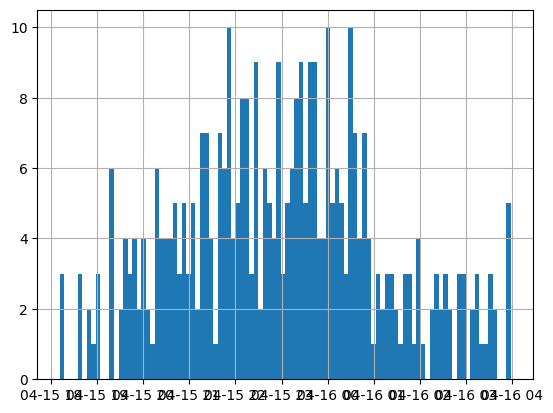

In [65]:
df_log.query('(`플레이시간` > "2025-04-15 06:00:00")&(`플레이시간` < "2025-04-16 04:00:00")')['플레이시간'].hist(bins = 100)